# Titanic - Machine Learning from Disaster


# Survivor  prediction on Titanic shipwreck

In [44]:
# For linear algebra
import numpy as np 

#For data processing
import pandas as pd 

# For data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Acquiring the datasets

In [2]:
%pwd

'C:\\Users\\spand\\Desktop'

In [3]:
cd ..

C:\Users\spand


In [4]:
cd \Users\spand\OneDrive\Desktop\data\titanic

C:\Users\spand\OneDrive\Desktop\data\titanic


In [5]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Data Analysis

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###### Conclusion:The target varaible is Survived, 2 features are float, 5 integers, 5 objects

In [7]:
 print('Number of columns:',train_data.shape[1], '\nNumber of rows:', train_data.shape[0])

Number of columns: 12 
Number of rows: 891


### The features of the data with discription

survival:    Survival 
PassengerId: Id of a passenger. 
pclass:      Ticket class     
sex:         Sex     
Age:         Age in years     
sibsp:       # of siblings / spouses aboard the Titanic     
parch:       # of parents / children aboard the Titanic     
ticket:      Ticket number     
fare:        Passenger fare     
cabin:       Cabin number     
embarked:    Port of Embarkation (The three ports were 
                                  Queesntown,Ireland (present day Cobh, Ireland), 
                                  Southampton, U.K., and
                                  Cherbourg, France)

In [8]:
train_data.head(10) # gives the first 10 rows 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Conclusion

From the above we can say that in training dataset only 38% have survived in the ship, when it was sinking.

Different age groups were traveling in the ship, the yougest person to travel was below 1 years and oldest person was 80 years.

The age field(count) has missing value, row number 5 has an NAN(not a number) value

Have to convert few features into numeric scale


# Data Cleaning 

Finding the total missing values in the training dataset and the overall contribution using percentages

In [10]:
total = train_data.isnull().sum().sort_values(ascending= False)
percentage_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percentage_2 = (round(percentage_1,1)).sort_values(ascending= False)
missing_data = pd.concat([total,percentage_2], axis=1,keys=['Total','Percentage(%)'])
missing_data.head(15)

,Total,Percentage(%)
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


### Graphical representation of the missing data using heat map

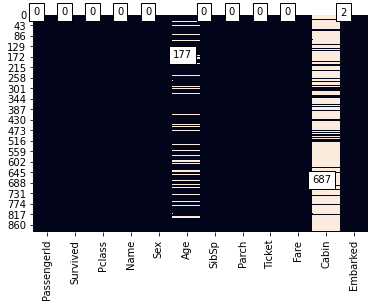

In [11]:
sns.heatmap(train_data.isnull(),cbar = False)
for index,val in enumerate(train_data.isnull().sum()):
    plt.text(index,val,str(val),bbox=dict(facecolor='w', alpha=1))
plt.show()

##### Conclusion:
The 'Age' field has 177 missing values, 'Cabin' has 687 missing values, 'Embarked' has 2 missing values.

We can drop 'Cabin' feature from the dataset, as it has lot of missing values and has not much importance in the analysis. Other  insignificant columns that can be dropped are 'Name','Passenger ID', 'Ticket'. 

The columns that have to be filled are 'Emabarked','Age'.

'Age' feature can be filled with mean, as a lot of values are missing and 'Embarked' can be filled with most occured values, as only 2 values are missing 

In [12]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train_data.drop(columns=['PassengerId','Name','Ticket','Cabin',],inplace=True)

In [14]:
train_data.head(10) # First 10 rows after deleting insignificant values 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [15]:
# Filling the missing values in 'Age' column with the mean
mean = train_data['Age'].mean()
train_data['Age'].fillna(mean, inplace= True)

# Filling the missing values in 'Embarked' column with most occured values
train_data['Embarked'].fillna("S", inplace= True)
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
train_data.info() # right now there are no missing values in the training dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Data Visualization 

Now we will visualize each variable of the trainind dataset to know the insights

### Visualization using Pclass

In [17]:
train_data["Survived"] = train_data["Survived"].replace([0,1],["Not Survived","Survived"])

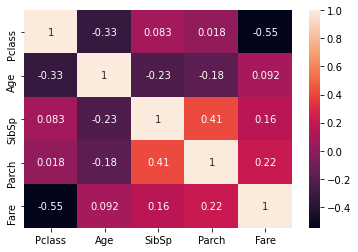

In [18]:
sns.heatmap(train_data.corr(),annot=True)
plt.show()

*Survived variable is positively correlated with Fare,Pcarch

*Pclass variable is positively correlated with Embarked,Sex,Age

*Sex variable is positively correlated with Embarked,Pclass,Age

*Age variable is positively correlated with Fare,Sex

*SibSp variable is positively correlated with Fare,Parch,Pclass

*Parch variable is positively correlated with Embarked,Fare,SibSp,Pclass and Survived

*Fare variable is positively correlated with Parch,SibSp,Age and Survived

*Embarked variable is positively correlated with Parch,Pclass,Sex,Pclass

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


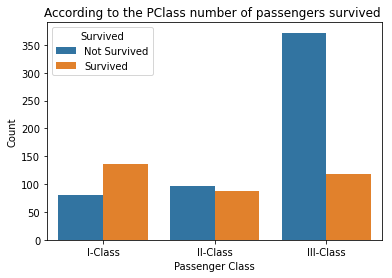

In [19]:
x= [0,1,2]
sns.countplot("Pclass", data = train_data, hue ="Survived")
labels = ["I-Class","II-Class","III-Class"]
plt.title("According to the PClass number of passengers survived ")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.xticks(x, labels)
plt.show()

###### Conclusion: Most of the passengers sitting in III-Class have lots there lives in tragedy and the hihgest number of passengers who got saved were from I-Class.

### Visualization using gender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


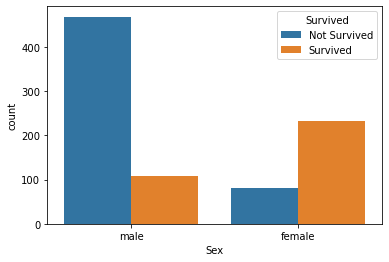

In [20]:
sns.countplot("Sex", data = train_data, hue ="Survived")
plt.show()

##### Conclusion: Most of the passengers who survived were females 

#### Question: Number of passengers were onboard based on gender and Number of passengers who were onboard based on the class

In [21]:
print(train_data.groupby('Sex')['Survived'].count())
print('\n\n',train_data.groupby('Pclass')['Survived'].count())

Sex
female    314
male      577
Name: Survived, dtype: int64


 Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


#### Question: Total number of passengers survived in the tragedy according to training dataset

In [22]:
print(train_data.groupby('Survived').size())
# 0 = Not Survived
# 1 = Surived

Survived
Not Survived    549
Survived        342
dtype: int64


#### Question: Exact number of passengers who survived based on the class and sex

In [23]:
print(train_data.groupby(['Survived','Pclass']).size())
print('\n\n',train_data.groupby(['Sex','Pclass','Survived']).size())

Survived      Pclass
Not Survived  1          80
              2          97
              3         372
Survived      1         136
              2          87
              3         119
dtype: int64


 Sex     Pclass  Survived    
female  1       Not Survived      3
                Survived         91
        2       Not Survived      6
                Survived         70
        3       Not Survived     72
                Survived         72
male    1       Not Survived     77
                Survived         45
        2       Not Survived     91
                Survived         17
        3       Not Survived    300
                Survived         47
dtype: int64


##### Conclusion: High priority to I-Class passengers and out of which Female passengers were more compared to males.

### Visualization using Age

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


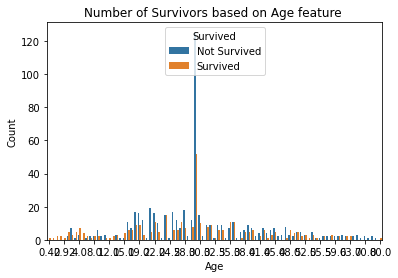

In [24]:
sns.countplot("Age",data = train_data, hue = "Survived")
plt.title("Number of Survivors based on Age feature ")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(range(0,90,4))
plt.show()

##### Conclusion: Most of the passengers in between late twenties and early thirties survived in the disaster

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

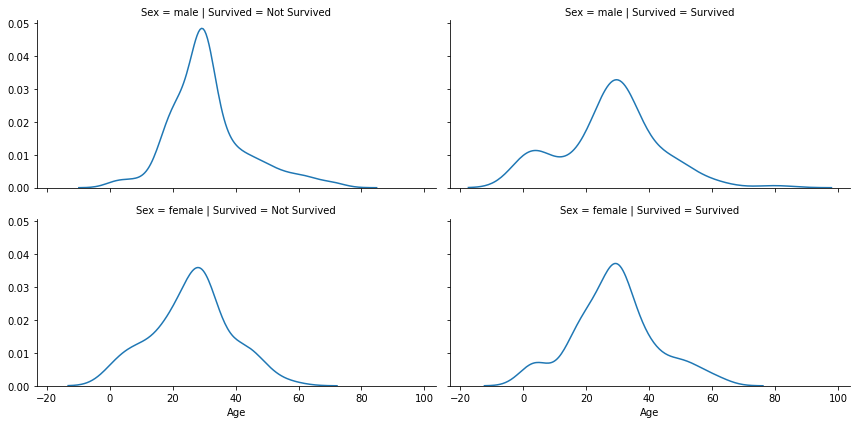

In [25]:
# Probability density function of Age
#plt.figure(figsize=(20,10))
facet=sns.FacetGrid(row='Sex',col='Survived',data=train_data,aspect=2)
facet.map(sns.distplot,'Age',hist=False)
plt.show()

##### Conclusion :
From the above visualisations, we can infer that Infants, and Females were given more priority in the rescue operation.
While Men roughly had a higher chance of survival between age of 18 and 50 years old; women, roughly had a higher chance of survival between age of 15 and 50 years old.

### Visualization using Embarked variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


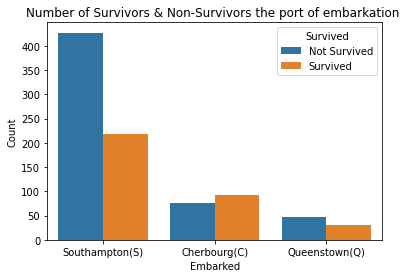

In [26]:
x = [0,1,2]
sns.countplot("Embarked", data = train_data, hue ="Survived")
labels = ["Southampton(S)","Cherbourg(C)", "Queenstown(Q)"]
plt.title("Number of Survivors & Non-Survivors the port of embarkation ")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.xticks(x,labels)
plt.show()

In [27]:
print(train_data.groupby('Embarked')['Survived'].count())


Embarked
C    168
Q     77
S    646
Name: Survived, dtype: int64


##### Encode target labels with value between 0 and n_classes-1. This transformer should be used to encode target values, i.e. y, and not the input X.That means the variables 'Sex' and 'Embarked' will change to values between 0 and n_classes-1.  In other words, It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [28]:
le = LabelEncoder()

In [29]:
for val in train_data.columns:
    if train_data[val].dtype == "O":
        train_data[val] = le.fit_transform(train_data[val])
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


In [30]:
train_data1 = pd.get_dummies(train_data["Pclass"]).rename({1:"1st Class",2:"2nd Class",3:"3rd Class"},axis = 1)

train_data1["1st Class"] = train_data1["1st Class"].astype(int)
train_data1["2nd Class"] = train_data1["2nd Class"].astype(int)
train_data1["3rd Class"] = train_data1["3rd Class"].astype(int)

In [31]:
train_data['Small Family'] = np.where((train_data['SibSp'] <= 2) & (train_data['SibSp'] != 0), 1, 0)
train_data['Lonely Child'] = np.where(train_data['Parch'] == 1, 1, 0)

train_data['Family'] = train_data['SibSp'] + train_data['Parch']
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Small Family,Lonely Child,Family
0,0,3,1,22.0,1,0,7.2500,2,1,0,1
1,1,1,0,38.0,1,0,71.2833,0,1,0,1
2,1,3,0,26.0,0,0,7.9250,2,0,0,0
3,1,1,0,35.0,1,0,53.1000,2,1,0,1
4,0,3,1,35.0,0,0,8.0500,2,0,0,0


In [32]:
train_data2 = pd.concat([train_data, train_data1], axis=1)

In [33]:
train_data2.drop(["Pclass","SibSp","Parch"],axis = 1, inplace = True)

<AxesSubplot:>

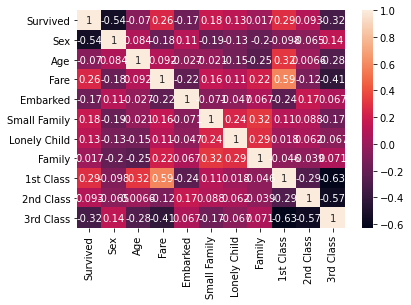

In [34]:
sns.heatmap(train_data2.corr(),annot = True)

In [35]:
train_data2.head(10)

,Survived,Sex,Age,Fare,Embarked,Small Family,Lonely Child,Family,1st Class,2nd Class,3rd Class
0,0,1,22.000000,7.2500,2,1,0,1,0,0,1
1,1,0,38.000000,71.2833,0,1,0,1,1,0,0
2,1,0,26.000000,7.9250,2,0,0,0,0,0,1
3,1,0,35.000000,53.1000,2,1,0,1,1,0,0
4,0,1,35.000000,8.0500,2,0,0,0,0,0,1
5,0,1,29.699118,8.4583,1,0,0,0,0,0,1
6,0,1,54.000000,51.8625,2,0,0,0,1,0,0
7,0,1,2.000000,21.0750,2,0,1,4,0,0,1
8,1,0,27.000000,11.1333,2,0,0,2,0,0,1
9,1,0,14.000000,30.0708,0,1,0,1,0,1,0


# Result of analysis

In [36]:
a=[{'Sex':'Male','Age':'(0,4),(18,50)','Class':'Upper class','Relatives':'1-3'},{'Sex':'Female','Age':'(0,4),(15,50)','Class':'Any class','Relatives':'0-4'}]
train_data=pd.DataFrame(a)
train_data[['Sex','Class','Age','Relatives']]

,Sex,Class,Age,Relatives
0,Male,Upper class,"(0,4),(18,50)",1-3
1,Female,Any class,"(0,4),(15,50)",0-4


From the above analysis, we can conclude that a persons likelihood of a chance of survival increases when:

Sex = Male
Age = Infants, or between 18 and 50 years old
Class = Upper or Middle
Relatives = Between 1 to 3

or,

Sex = Female
Age = Infants, or between 15 and 50 years old
Class = Any
Relatives = Between 0 to 4

### Splitting the data into training and testing

In [41]:
X = train_data2.drop(columns = "Survived",axis =1)
Y = train_data2["Survived"]
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

## Building Machine Learning Models

#### 1. Logistic Regression

 Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution

In [42]:
loreg = LogisticRegression(solver='liblinear')

##### Train model

In [46]:
xtrain_predict = loreg.fit(xtrain,ytrain)
xtrain_predict = loreg.predict(xtrain)
loreg_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_lo_as = accuracy_score(xtrain_predict,ytrain)
print("LogisticRegression accuarcy score of the Training Data: ",train_lo_as)
print()
loreg_train_predict.head()

LogisticRegression accuarcy score of the Training Data:  0.8117977528089888



,Predicted Value,Actual Value
140,1,0
439,0,0
817,0,0
378,0,0
491,0,0


##### Test model

In [48]:
xtest_predict = loreg.fit(xtest,ytest)
xtest_predict = loreg.predict(xtest)
lo_test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_lo_as = accuracy_score(xtest_predict,ytest)
print("LogisticRegression accuarcy score of the Testing Data: ",test_lo_as)
print()
loreg_train_predict.tail()

LogisticRegression accuarcy score of the Testing Data:  0.8156424581005587



,Predicted Value,Actual Value
835,1,1
192,1,1
629,0,0
559,1,1
684,0,0


#### 2. KNN or K Nearst Neighbour

k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

##### Train model

In [112]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [117]:
knn.fit(xtrain, ytrain)
knn_train_predict =  pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_knn_as = accuracy_score(xtrain_predict,ytrain)
print("KNN Machine Training Data Accuracy Score is: ",train_knn_as)
print()
knn_train_predict.head()

KNN Machine Training Data Accuracy Score is:  0.7612359550561798



,Predicted Value,Actual Value
140,1,0
439,0,0
817,1,0
378,0,0
491,0,0


##### Test Model

In [116]:
knn.fit(xtrain, ytrain)
xtest_predict = knn.predict(xtest)
knn_test_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
test_knn_as = accuracy_score(xtrain_predict,ytrain)
print("KNN Machine Training Data Accuracy Score is: ",test_knn_as)
print()
knn_test_predict.head()

KNN Machine Training Data Accuracy Score is:  0.7612359550561798



,Predicted Value,Actual Value
140,1,0
439,0,0
817,1,0
378,0,0
491,0,0


#### 3.Support Vector Machines

Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [58]:
svm = SVC(kernel='rbf', C=100)

##### Train Model

In [59]:
svm.fit(xtrain, ytrain)
xtrain_predict = svm.predict(xtrain)
svm_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_svm_as = accuracy_score(xtrain_predict,ytrain)
print("Support Vector Machine Training Data Accuracy Score is: ",train_svm_as)
print()
svm_train_predict.head()

Support Vector Machine Training Data Accuracy Score is:  0.8188202247191011



,Predicted Value,Actual Value
140,1,0
439,0,0
817,0,0
378,0,0
491,0,0


##### Test Model

In [60]:
xtest_predict = svm.fit(xtest,ytest)
xtest_predict = svm.predict(xtest)
svm_test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_svm_as = accuracy_score(xtest_predict,ytest)
print("Random Forest Test Data Accuracy Score: ",test_svm_as)
print()
svm_test_predict.head()

Random Forest Test Data Accuracy Score:  0.8044692737430168



,Predicted Value,Actual Value
495,0,0
648,0,0
278,0,0
31,1,1
255,0,1


##### KNN confidence score is better than Logistics Regression and SVM.

#### 4. Naive Bayes classifier

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem

##### Train Model

In [98]:
gaussian = GaussianNB()

In [118]:
gaussian.fit(xtrain, ytrain)
xtrain_predict = gaussian.predict(xtrain)
gaussian_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_gaussian_as = accuracy_score(xtrain_predict,ytrain)
print("Naive Bayes Classifier Train Data Accuracy Score: ",train_gaussian_as)
print()
gaussian_train_predict.head()

Naive Bayes Classifier Train Data Accuracy Score:  0.7612359550561798



,Predicted Value,Actual Value
140,1,0
439,0,0
817,1,0
378,0,0
491,0,0


##### Test Model

In [119]:
gaussian.fit(xtrain, ytrain)
xtest_predict = gaussian.predict(xtest)
gaussian_test_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
test_gaussian_as = accuracy_score(xtrain_predict,ytrain)
print("Naive Bayes Classifier Test Data Accuracy Score: ",test_gaussian_as)
print()
gaussian_test_predict.head()

Naive Bayes Classifier Test Data Accuracy Score:  0.7612359550561798



,Predicted Value,Actual Value
140,1,0
439,0,0
817,1,0
378,0,0
491,0,0


###### The model generated confidence score is the lowest among the models evaluated so far.

#### 5.Decision Tree

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

##### Train Model

In [75]:
dt = DecisionTreeClassifier()

In [76]:
dt.fit(xtrain, ytrain)
xtrain_predict = dt.predict(xtrain)
dt_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_dt_as = accuracy_score(xtrain_predict,ytrain)
print("Decision Tree Classifier Train Data Accuracy Score: ",train_dt_as)
print()
dt_train_predict.head()

Decision Tree Classifier Train Data Accuracy Score:  0.9817415730337079



,Predicted Value,Actual Value
140,0,0
439,0,0
817,0,0
378,0,0
491,0,0


##### Test Model

In [120]:
xtest_predict = dt.fit(xtest,ytest)
xtest_predict = dt.predict(xtest)
dt_test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_dt_as = accuracy_score(xtest_predict,ytest)
print("Decision Tree Classifier Test Data Accuracy Score: ",test_dt_as)
print()
dt_test_predict.head()

Decision Tree Classifier Test Data Accuracy Score:  1.0



,Predicted Value,Actual Value
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


##### The model confidence score is the highest among models evaluated so far.

#### 6. Random Forrest

Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

##### Train model

In [79]:
rf = RandomForestClassifier()

In [80]:
rf.fit(xtrain, ytrain)
xtrain_predict = rf.predict(xtrain)
rf_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_rf_as = accuracy_score(xtrain_predict,ytrain)
print("Random Forest Train Data Accuracy Score: ",train_rf_as)
print()
rf_train_predict.head()

Random Forest Train Data Accuracy Score:  0.9817415730337079



,Predicted Value,Actual Value
140,0,0
439,0,0
817,0,0
378,0,0
491,0,0


##### Test Model

In [81]:
xtest_predict = rf.fit(xtest,ytest)
xtest_predict = rf.predict(xtest)
rf_test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_rf_as = accuracy_score(xtest_predict,ytest)
print("Random Forest Test Data Accuracy Score: ",test_rf_as)
print()
rf_test_predict.head()

Random Forest Test Data Accuracy Score:  1.0



,Predicted Value,Actual Value
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1


#### 7. Perceptron

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

##### Train model

In [123]:
perceptron = Perceptron()

In [124]:
per.fit(xtrain, ytrain)
xtrain_predict = per.predict(xtrain)
per_train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_per_as = accuracy_score(xtrain_predict,ytrain)
print("Perceptron classifier Train Data Accuracy Score: ",train_per_as)
print()
per_train_predict.head()

Perceptron classifier Train Data Accuracy Score:  0.6390449438202247



,Predicted Value,Actual Value
140,0,0
439,0,0
817,0,0
378,0,0
491,0,0


##### Test model

In [125]:
xtest_predict = per.fit(xtest,ytest)
xtest_predict = per.predict(xtest)
per_test_predict = pd.DataFrame({"Predicted Value" : xtest_predict,
                              "Actual Value" : ytest
})
test_per_as = accuracy_score(xtest_predict,ytest)
print("Perceptron classifier Test Data Accuracy Score: ",test_per_as)
print()
per_test_predict.head()

Perceptron classifier Test Data Accuracy Score:  0.6145251396648045



,Predicted Value,Actual Value
495,0,0
648,0,0
278,0,0
31,0,1
255,0,1


## Finding the Best Model with the help of Accuracy Score

In [127]:
Train = [train_lo_as,train_rf_as,train_dt_as,train_svm_as,train_gaussian_as, train_per_as]
Test = [test_lo_as,test_rf_as,test_dt_as,test_svm_as,test_gaussian_as, test_per_as]

Accuracy_Score = pd.DataFrame({"Train Score": Train,"Test Score":Test})
Accuracy_Score.index = ["LogisticRegression", "RandomForest", "DecisionTreeClassifier", "SupportVectorMachine","GaussianNB","Perceptron"]
Accuracy_Score

,Train Score,Test Score
LogisticRegression,0.811798,0.815642
RandomForest,0.981742,1.000000
DecisionTreeClassifier,0.981742,1.000000
SupportVectorMachine,0.818820,0.804469
GaussianNB,0.761236,0.761236
Perceptron,0.639045,0.614525


### Conclusion

#### Random Forest and Decision Tree has the highest accuarcy score

### Summary 

Summary
I started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards I started training 7 different machine learning models, picked random forest and Decision Tree with highest accuracy. 

Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.